In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import subprocess as sp

def run_cmd(nproc, err, iterations):
    cmd = ['wsl', './main',
           str(nproc),
           str(err),
           str(iterations)
           ]
    output = sp.check_output(cmd, shell=True).decode('cp866')
    return float(output)

def plot_time_size(initial_err, end_err, factor, iterations):
    def calc_time(nproc):
        x, y = np.array([]), np.array([])
        err = initial_err
        while err > end_err:
            x = np.append(x, err)
            time = run_cmd(nproc, err, iterations)
            y = np.append(y, time)
            err /= factor
        return x, y

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='err', ylabel='time, s')
    ax.set_xscale('log')
    ax.invert_xaxis()
    ax.set_yscale('log')

    x, ys = calc_time(1)
    ax.plot(x, ys, label='serial')
    ax.legend()

    x, yp2 = calc_time(2)
    ax.plot(x, yp2, label='parallel 2')
    ax.legend()

    x, yp4 = calc_time(4)
    ax.plot(x, yp4, label='parallel 4')
    ax.legend()

def plot_time_proc(nproc_max, err, iterations):
    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='time, s', title='Execution time')

    x = range(1, nproc_max + 1)
    y = np.array([])
    for nproc in x:
        time = run_cmd(nproc, err, iterations)
        y = np.append(y, time)

    ax.plot(x, y)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='acceleration', title='Acceleration')
    y = y[0] / y
    ax.plot(x, y)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='efficiency', title='Efficiency')
    y = y / x
    ax.plot(x, y)

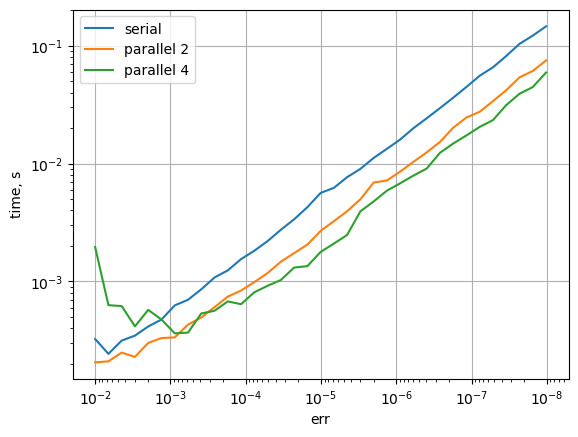

In [13]:
plot_time_size(1.e-2, 1.e-8, 1.5, 10)

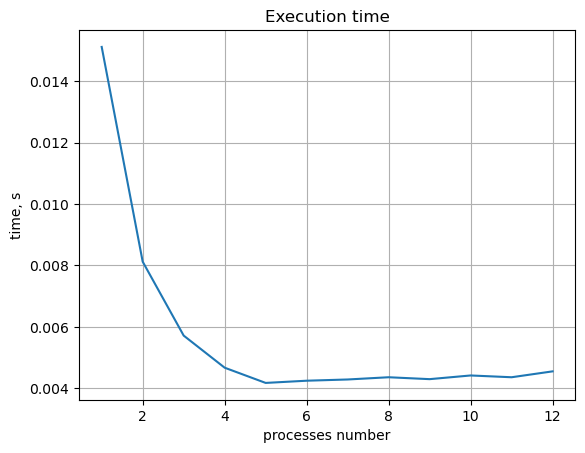

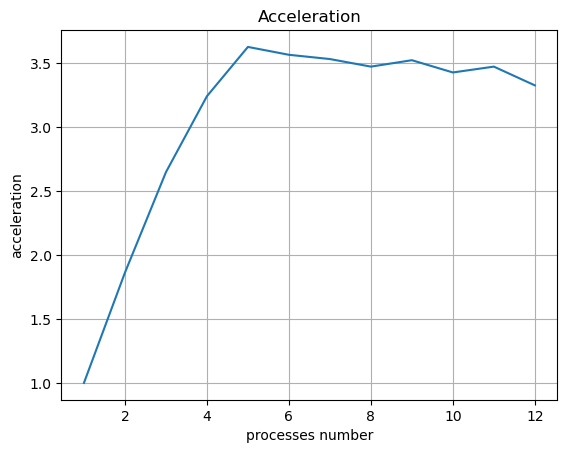

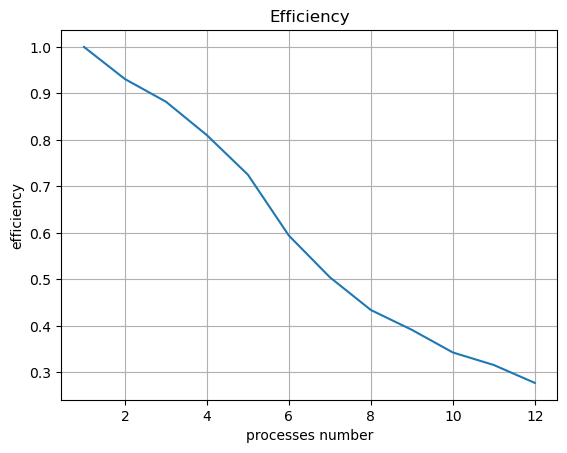

In [15]:
plot_time_proc(12, 1.e-6, 100)